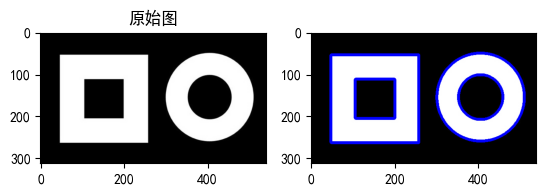

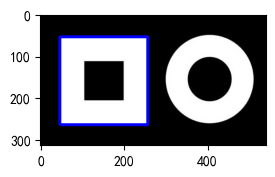

In [37]:
"""
cv2.findContours() 是 OpenCV 中一个用于图像轮廓检测的函数。该函数可以从二值化图像中检测出物体的轮廓，返回一个列表，每个元素都是一个包含轮廓所有点坐标的 numpy 数组。该函数的语法如下：

contours, hierarchy = cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]])
其中，参数含义如下：
    image: 输入图像，必须是一个二值化图像，即只有黑白两种颜色。
    mode: 轮廓检索模式，有以下几种取值：
    cv2.RETR_EXTERNAL: 只检测最外层轮廓。
    cv2.RETR_LIST: 检测所有轮廓，但不建立轮廓间的父子关系。
    cv2.RETR_CCOMP: 检测所有轮廓，并将轮廓分成两级层次结构，顶层为物体的外壳，次层为物体内部的空洞。
    cv2.RETR_TREE: 检测所有轮廓，并建立完整的轮廓层次结构。
    method: 轮廓逼近方法，有以下几种取值：
    cv2.CHAIN_APPROX_NONE: 存储所有轮廓点。
    cv2.CHAIN_APPROX_SIMPLE: 只存储轮廓的拐点，例如一个矩形只存储四个角点。
    cv2.CHAIN_APPROX_TC89_L1 和 cv2.CHAIN_APPROX_TC89_KCOS: 使用 Teh-Chin 链逼近算法。
    contours: 用于存储检测到的轮廓，可以是一个空列表。
    hierarchy: 轮廓层次结构，可以是一个空列表。
    offset: 轮廓点坐标的偏移量，通常不需要设置。

"""
import cv2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
img=cv2.imread("./images/1.jpg")
grayImg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(221)
plt.title("原始图")
plt.imshow(cv2.cvtColor(grayImg, cv2.COLOR_BGR2RGB))
#二值化
_,dst=cv2.threshold(grayImg,127,255,cv2.THRESH_BINARY)
#获取边框和层级关系，注意这里contours是个数组，有多个轮廓
contours, hierarchy = cv2.findContours(dst, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
plt.subplot(222)
"""
cv2.drawContours() 是 OpenCV 中用于绘制轮廓的函数。它可以在图像上绘制出指定轮廓的边界，填充轮廓内部，或者同时绘制出轮廓边界和内部区域。

cv2.drawContours() 的语法如下：
注意drawContours会直接修改原图片，建议copy在绘制
cv2.drawContours(image, contours, contourIdx, color, thickness=None, lineType=None, hierarchy=None, maxLevel=None, offset=None)
参数说明如下：
    image：需要绘制轮廓的图像。注意，该图像必须是单通道的，例如灰度图像。
    contours：包含所有轮廓数据的 Python 列表。每个轮廓都是一个 Numpy 数组，包含一组点的坐标。
    contourIdx：要绘制的轮廓的索引。如果该值为负数，则绘制所有轮廓。
    color：绘制轮廓的颜色。可以是一个三元素的元组，表示 RGB 值，或者是一个单值的整数，表示灰度值。
    thickness：绘制轮廓的线条宽度。默认值为 1。
    lineType：绘制轮廓的线条类型。可以是 cv2.LINE_4、cv2.LINE_8 或者 cv2.LINE_AA。默认值为 cv2.LINE_8。
    hierarchy：轮廓的层级结构。可以忽略该参数，除非需要绘制嵌套轮廓。
    maxLevel：要绘制的轮廓的最大层级。如果该值为 0，则只绘制指定轮廓；如果该值为 1，则同时绘制指定轮廓和它的直接子轮廓；以此类推。默认值为 None，表示绘制所有子轮廓。
    offset：轮廓绘制的偏移量。可以忽略该参数，除非需要在图像的某个子区域上绘制轮廓。
"""
plt.imshow(cv2.drawContours(img.copy(), contours, -1, (0, 0, 255), 5))
plt.show()
#绘制第0个边框
plt.subplot(223)
plt.imshow(cv2.drawContours(img.copy(), contours, 2, (0, 0, 255), 5))
plt.show()

109 109 315 267


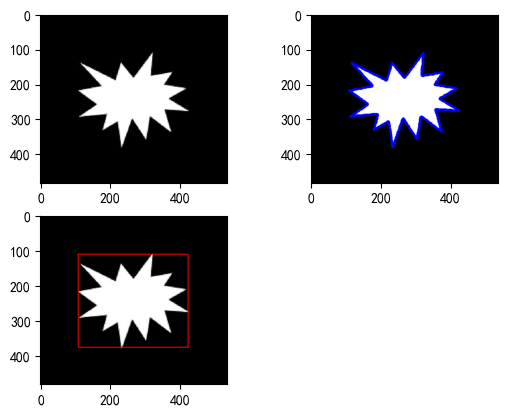

In [38]:
"""
矩形包围框
"""
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
img=cv2.imread("./images/2.jpg")
grayImg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title("灰度图")
plt.subplot(221)
plt.imshow(grayImg,cmap="gray")
#二值化
_,dst=cv2.threshold(grayImg,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(dst, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
plt.subplot(222)
plt.imshow(cv2.drawContours(img.copy(), contours, 2, (0, 0, 255), 5))
"""
矩形包围框是指图像轮廓的最小矩形边界。OpenCV提供的boundingRect()方法可以自动计算轮廓最小矩形边界的坐标、宽和高。boundingRect()方法的语法如下：
     retval = cv2.boundingRect (array)
参数说明：
　array：轮廓数组。
返回值说明：
　retval：元组类型，包含4个整数值，分别是最小矩形包围框的：左上角顶点的横坐标、左上角顶点的纵坐标、矩形的宽和高。所以也可以写成x, y, w, h = cv2.boundingRect (array)的形式。
"""
x,y,w,h = cv2.boundingRect (contours[2])
print(x,y,w,h)
dstImg=img.copy()
plt.subplot(223)
cv2.rectangle(dstImg,(x,y),(x+w,y+h),(0,0,255),2)
plt.imshow(cv2.cvtColor(dstImg, cv2.COLOR_BGR2RGB))
plt.show()

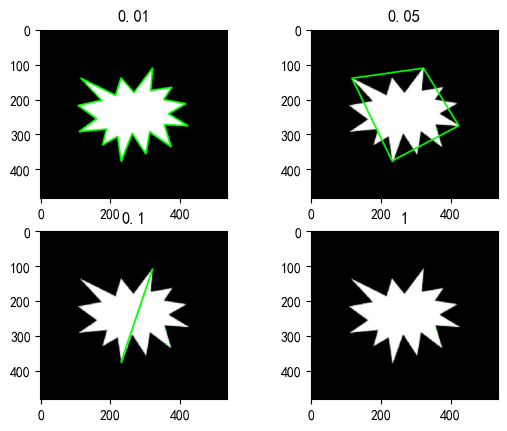

In [39]:
#近似轮廓
# 对每个轮廓进行近似
for i,e in enumerate([0.01,0.05,0.1,1]):
    img1=img.copy()
    for cnt in contours:
        epsilon = e * cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, epsilon, True)
    
        # 绘制近似的轮廓
        cv2.drawContours(img1, [approx], 0, (0, 255, 0), 3)
    plt.subplot(int("22"+str(i+1)))
    plt.title(e)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

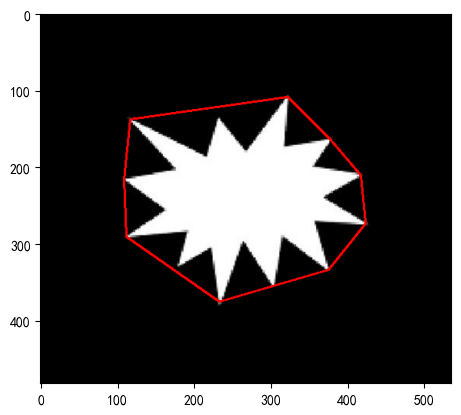

In [40]:
img1=img.copy()
# 根据轮廓面积从大到小排序
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
hull=cv2.convexHull(sorted_contours[0])
cv2.polylines(img1,[hull],True,(0,0,255),2)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()
